In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,8]

df_score = pd.read_csv('thtd4/result_anomaly_score_hum1.csv')
df_status = pd.read_csv('thtd4/result_anomaly_status_hum1.csv')
df_data = pd.read_csv('thtd4/result_data_hum1.csv')
df_thresh = pd.read_csv('thtd4/result_anomaly_threshold_hum1.csv')
print(df_score.describe())
print(df_status.describe())
print(df_data.describe())
print(df_thresh.describe())
df_status = df_status.replace('abnormal', -1, regex=True)
df_status = df_status.replace('normal', 1, regex=True)
df_status.value_counts()

              score
count  64644.000000
mean       0.142137
std        0.065048
min       -0.239000
25%        0.112000
50%        0.156000
75%        0.188000
max        0.414000
          status
count      64644
unique         2
top     'normal'
freq       63006
               data
count  64645.000000
mean      29.750027
std        7.003849
min        1.200000
25%       24.400000
50%       27.700000
75%       34.800000
max      120.000000
          threshold
count  64644.000000
mean      -0.031249
std        0.038354
min       -0.202000
25%       -0.053000
50%       -0.025000
75%        0.005000
max        0.010000


status
 1        63006
-1         1638
dtype: int64

<class 'pandas.core.series.Series'>


C:\Users\Radityo Fajar\AppData\Local\Temp\ipykernel_17100\3246935675.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([c1, c2,c3], labels=['anomaly score', 'anomaly_score_threshold', 'predicted anomalies'])


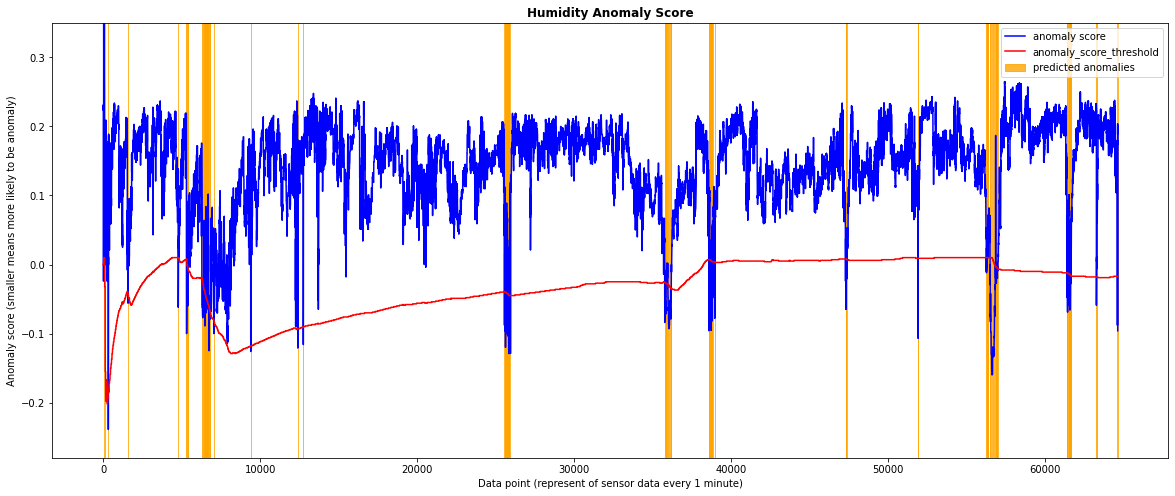

In [44]:
x = np.arange(64644)
y = df_status['status']
#df_thresh= df_thresh.add(-0.05)
print(type(y))
fig, ax = plt.subplots()
ax.set_ylim(-0.28,0.35)
ax.set_title('Humidity Anomaly Score', fontweight ="bold")
ax.set_xlabel('Data point (represent of sensor data every 1 minute)')
ax.set_ylabel('Anomaly score (smaller means more likely to be anomaly)')
c1 = ax.plot(df_score,'b')
c2 = ax.plot(df_thresh, 'r')
c3 = ax.fill_between(x,0,1, where= y == -1,
                color='orange', alpha=0.8, transform=ax.get_xaxis_transform())
ax.legend([c1, c2,c3], labels=['anomaly score', 'anomaly_score_threshold', 'predicted anomalies'])

<class 'pandas.core.series.Series'>


C:\Users\Radityo Fajar\AppData\Local\Temp\ipykernel_17100\4050503308.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([c1,c2,c3,c4], labels=['Sensor value', 'lower_threshold', 'upper_threshold', 'predicted anomalies'])


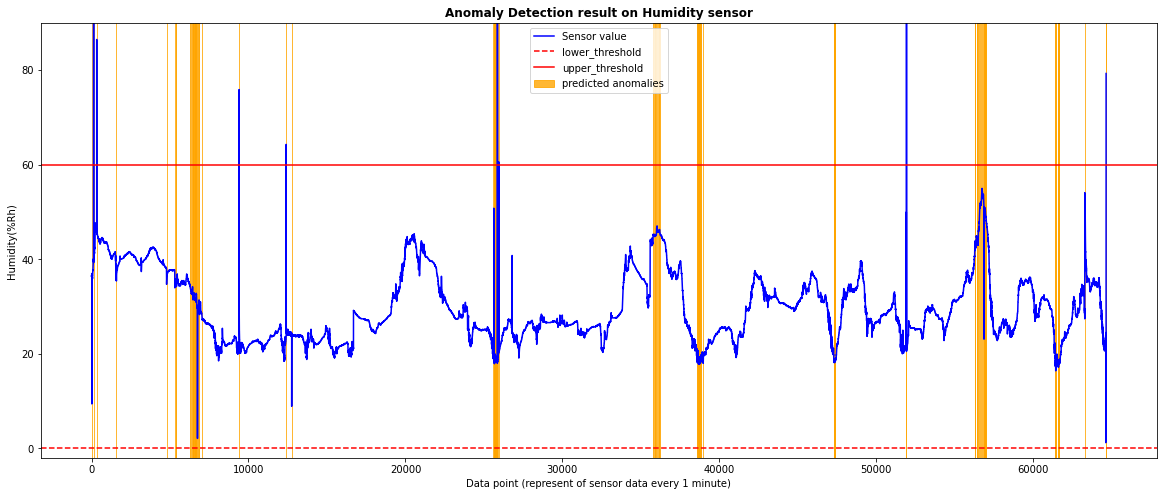

In [45]:
x = np.arange(64644)
y = df_status['status']
y2 = df_score['score']
y3 = df_data['data']
print(type(y))
fig, ax = plt.subplots()
ax.set_ylim(-2,90)
ax.set_title('Anomaly Detection result on Humidity sensor', fontweight ="bold")
ax.set_xlabel('Data point (represent of sensor data every 1 minute)')
ax.set_ylabel('Humidity(%Rh)')

c1 = ax.plot(df_data, 'b')
c2 = ax.axhline(y=0, color='red', linestyle='--')
c3 = ax.axhline(y=60, color='red')
c4 = ax.fill_between(x,0, 1, where= y < 0,
                color='orange', alpha=0.8, transform=ax.get_xaxis_transform())
ax.legend([c1,c2,c3,c4], labels=['Sensor value', 'lower_threshold', 'upper_threshold', 'predicted anomalies'])